In [449]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import plotly.graph_objs as go


from pathlib import Path

import sys
import os
data_path = os.path.abspath('../data')
sys.path.append(data_path)

models_path = os.path.abspath('../models')
sys.path.append(models_path)

utils_path = os.path.abspath('../utils')
sys.path.append(utils_path)

import plot_state_map
import correlations as corr
import reviews_processing
import load_and_find_party_winners
import favourite_beers_processing
import plotting_utils

In [425]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Visualization of beer style preferences across US states  

For each state, the plot displays favourite beer styles (one with the best average rating on the state level) over the years.  

Over the years, U.S. favorites are Stouts, Porters and IPAs. 

It is worth noting that e.g. Kentucky, Massachusets, Connecticut, Ohio, Oregon chose Stouts without an exeption.  

On the other hand Montana, North Dakota, South Dakota, Utah, Vermont, Wyoming have more diverse tastes over these years.  

Another interesting observation is that after 2010 Stouts dominate as beer style favourite for majority of states, being favorite in 47 states in 2016.

In [429]:
# Change for path where data is on your machine
project_root = Path.cwd().parents[2]
beer_advocate_path = project_root / "BeerAdvocate"
reviews_path = str(beer_advocate_path / "reviews_df.csv")
users_path = beer_advocate_path / "users.csv"

project_dir = Path.cwd().parents[1]
winners_path = project_dir / "data/generated/party_winners_over_years.csv"

users_reviews = reviews_processing.Reviews(users_path, reviews_path)
year_list = list(np.arange(2004, 2018, 1, dtype=int))
results = users_reviews.aggregate_preferences_year(year_list, all_states=True)
winners = load_and_find_party_winners.state_winner_years(winners_path)

# Reviews for counts
total_reviews = users_reviews.filter_beer_type()

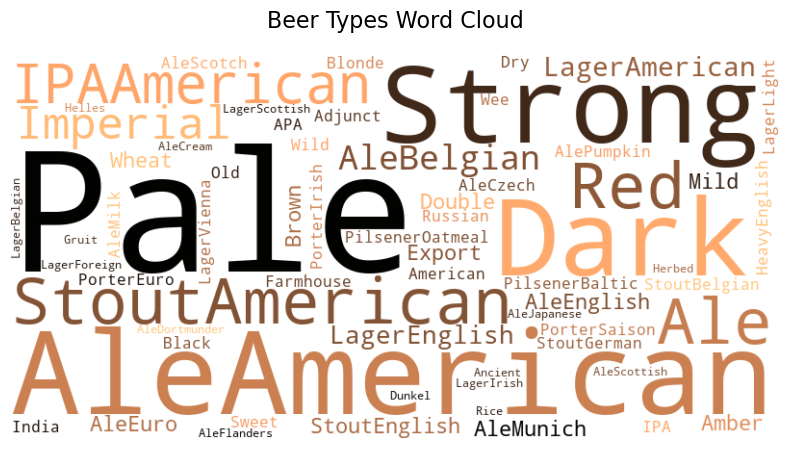

In [452]:
plotting_utils.create_worldcloud(total_reviews)

In [431]:
fig = plotting_utils.plot_review_count(total_reviews)
fig.write_html('count_total_reviews.html')

In [432]:
# Reformat data for plotting
favourite_beers = favourite_beers_processing.FavouriteBeers(results)
data = favourite_beers.favbeer_process_for_mapplotting()
data_plot = plot_state_map.transform_state_abbreviations(data)
data_plot = data_plot.reset_index()

winners_drop = winners[winners.index != 'District Of Columbia']
winners_plot = plot_state_map.transform_state_abbreviations(winners_drop)
winners_plot.sort_values(by='year', ascending=True, inplace=True)
winners_plot = winners_plot.reset_index()

In [433]:
plot = plot_state_map.barplot_fav_styles_per_state(results, data)
# plot.write_html('count.html')

In [434]:
# Compare top3 favourite beer styles between two selected states
object_class = favourite_beers_processing.FavouriteBeers(results)
top_three = object_class.threefavbeer_for_barplotting()

state1 = 'Florida'
state2 = 'Iowa'
plot_state_map.barplot_threefav_styles_compare(top_three, state1, state2)

In [435]:
# Initialize the PlotStateMap object with already abbreviated state names
hover_data = {"beer_style": True, "ratings": True, "years": False}
state_map = plot_state_map.PlotStateMap(data_by_state=data_plot, hover_data=hover_data, animation_frame='years', title="Favourite Beer Styles Across U.S. States", state_names_already_abbreviated=True, dataMetric="beer_style")

# Plot the map
fig = state_map.plot_map()
fig.write_html('fav_beer_us.html')

dataframe


In [436]:
# Plot winning parties
hover_data = {"winner": True, "state": True, "year": False}

state_map = plot_state_map.PlotStateMap(data_by_state=winners_plot, hover_data=hover_data, animation_frame='year', title="Election Winners Across U.S. States", state_names_already_abbreviated=True, dataMetric="winner")

# Plot the map
fig1 = state_map.plot_map()
fig1.write_html('usmap_politics.html')

dataframe
